# Assignment #1 - Linear Regression

### Tanvi Vijay Rasam

# Introduction

Linear regression is an important tool for modelling and analyzing data. Linear Regression sets up a relationship between dependent variable (the value to be predicted) and one or more independent variables (input attributes) using a best fit straight line (also known as regression line) .The best fit line should be constructed such that it reduces the differences between the distances of data points from the line. 
The case where one independent variable is used is called simple linear regression. For more than one independent variable, the process is called multiple linear regression. In multivariate linear regression, multiple correlated dependent variables are predicted, rather than a single scalar variable.

Equation for Linear Regression-

f(x;w)=wDxD+⋯+w1x1+w0

where D, is the number of attributes or feature in our input data.

In this Assignment, two methods to obtain best fit line from linear regression are studied and compared- Least Squares method and Least Mean Squares Method. These methods are used for model parameter estimation and inference in linear regression. They differ in presence of a closed-form solution, robustness with respect to heavy-tailed distributions, and theoretical assumptions needed to validate desirable statistical properties.


# Data

### Description

Airbnb is a platform business that links two groups - the hosts and the guests. Anybody with an open room/house or free space can become a host on Airbnb . It is a good way for side  income with minimal effort. It serves as an excellent platform to advertise space because the of global user base to support it. Thus, Airbnb gives hosts an easy way to rent their space that would otherwise be wasted.
This Dataset includes rooms information for AirBnb sites in Amsterdam. It is a multivariate dataset containing 10.4k instances and 16 attributes.

Attributes description:

accommodates- no. of people the room can accomodate
bathrooms- no. of bathrooms in the room
bedrooms- no. of bedrooms in the room
calculated_host_listings_count - calculated count of how many times one's listing has been viewed
guests_included - no. of geust included
host_listings_count- count of how many times one's listing has been viewed
latitude- location latitude measurement
longitude- location longitude measurement
minimum_nights- minimum no. of nights needed
number_of_reviews- no. of reviews received
d_centre- dcenter value
instant_bookable_f- no instant booking allowed
instant_bookable_t- instant booking allowed
room_type_Entire home/apt- whether eniter home/apt or not
room_type_Private room- whether Private room or not
room_type_Shared room- whether Shared room or not


Goal :To Predict the price of the Room based on various input attributes

Source:  https://www.kaggle.com/adityadeshpande23/amsterdam-airbnb

### Plots for Understanding or Analysis

In [2]:
# importing the required packages for the Assignment

import pandas as pd # storing and mnipulating the dataset
import matplotlib.pyplot as plt # for data visualization 
import seaborn as sns # for data visualization 
import warnings  
import pylab as pl
import pdb
warnings.filterwarnings("ignore") # to not display any warnings generated 
import numpy as np # for array computations

In [3]:
# Joining the data from both csv files

x_train = pd.read_csv("train.csv")
y_train = pd.read_csv("y_train.csv",names=['Price'])

df_assg1 = pd.concat([x_train, y_train], axis=1)
df_assg1.head()

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,Price
0,4,2.0,2.0,1,1,1.0,52.358466,4.933843,2,8,3.279483,1,0,1,0,0,160.0
1,4,1.0,2.0,1,2,1.0,52.363589,4.983353,3,0,5.951843,1,0,1,0,0,120.0
2,2,1.0,1.0,1,1,1.0,52.375209,4.861647,3,8,2.601055,1,0,1,0,0,99.0
3,2,1.0,1.0,1,1,1.0,52.387382,4.890457,2,41,1.095138,1,0,0,1,0,100.0
4,2,1.0,1.0,1,1,1.0,52.384062,4.889877,3,0,0.844491,1,0,1,0,0,175.0


In [4]:
#df_assg1.corr()

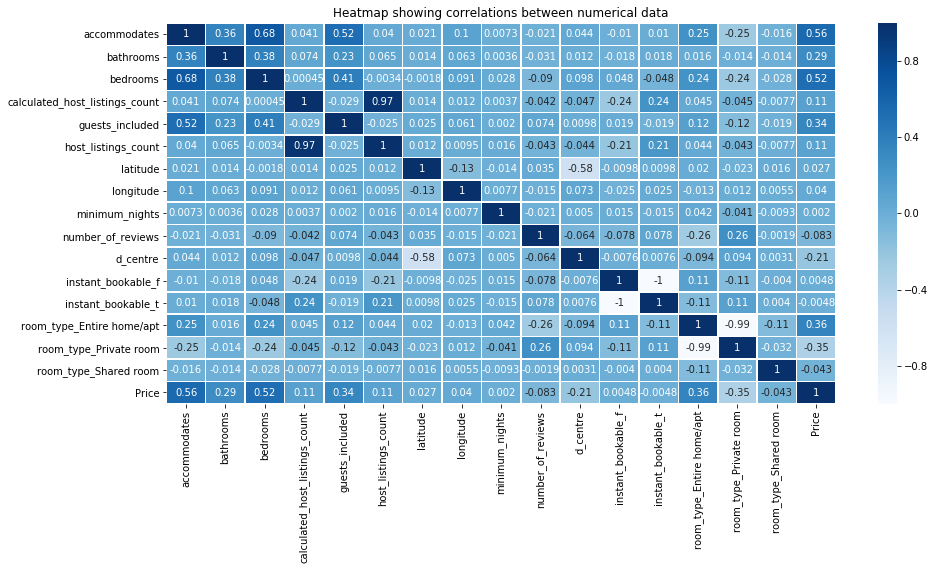

In [5]:
plt.figure(figsize=(15,7))  
sns.heatmap(df_assg1.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

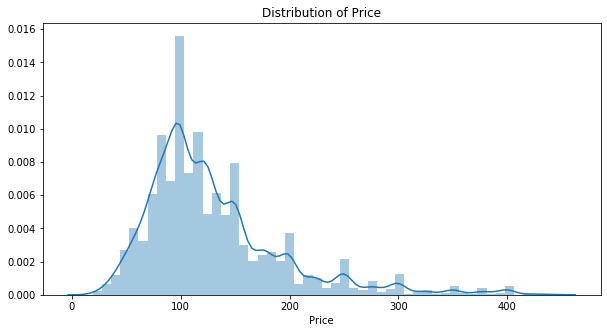

In [6]:
#1
pl.figure(figsize=(10,5))
pl.title("Distribution of Price")
ax = sns.distplot(df_assg1.Price)



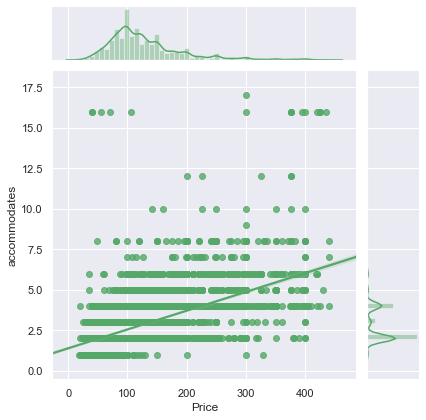

In [31]:
#2
sns.jointplot(data=df_assg1, x='Price', y='accommodates', kind='reg', color='g')
plt.show()




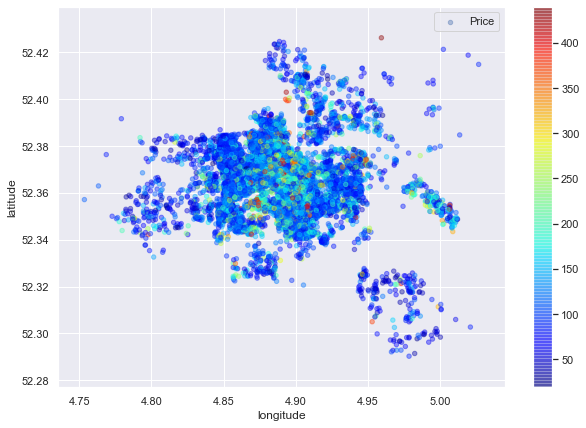

In [40]:
#3
df_assg1.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
     label="Price", figsize=(10,7),
    c=df_assg1["Price"], cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
#save_fig("housing_prices_scatterplot")



## Preliminary Observation

From the first plot it is observed that Range of Prices of rooms on AirBnb in Amsterdam is from approx 10 - 410. From second plot it can be seen that- 1.If accommodates count is very high then rooms of low as well as high price are available. 2. If accommodates count is medium ie. in between 10- 14 the the price of rooms is on higher side.3. For accommodates count to be 1, there are hardly any costly rooms with prices greater than 200. 4. For all other accommodates count ranges, rooms with all price ranges are available. 5. Thus, accommodates count is not sufficient enough to determine Price of the room. From the last plot, Rooms located on the boundaries lie within Price Range of approx 10-70 and as we move to the internal parts, the price range increases with the central part having the maximum price range of approx 370-440.  Fom the correlation matrix we can see that the price is correlated more with accommodates and bedrooms compare to d_center and room_type_Private_room

## Preprocessing of the data

In [41]:
#checking for null values in dataset
df_assg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10498 entries, 0 to 10497
Data columns (total 17 columns):
accommodates                      10498 non-null int64
bathrooms                         10498 non-null float64
bedrooms                          10498 non-null float64
calculated_host_listings_count    10498 non-null int64
guests_included                   10498 non-null int64
host_listings_count               10498 non-null float64
latitude                          10498 non-null float64
longitude                         10498 non-null float64
minimum_nights                    10498 non-null int64
number_of_reviews                 10498 non-null int64
d_centre                          10498 non-null float64
instant_bookable_f                10498 non-null int64
instant_bookable_t                10498 non-null int64
room_type_Entire home/apt         10498 non-null int64
room_type_Private room            10498 non-null int64
room_type_Shared room             10498 non-null int64


1.Joining of two datasets x_train and y_train done in the start 

2.As there are no null values, the preprocessing step to drop or replace null values with mean, median or most occured values will be skipped

3.The dataset also doesn't contain categorical attributes to perform encoding. If encoding would have been needed, One Hot Encoding with get_dummies method could have been used.This creates a binary column for each category and returns a sparse matrix or dense array.By default, the encoder derives the categories based on the unique values in each feature.

In [42]:
df_assg1.head()

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,Price
0,4,2.0,2.0,1,1,1.0,52.358466,4.933843,2,8,3.279483,1,0,1,0,0,160.0
1,4,1.0,2.0,1,2,1.0,52.363589,4.983353,3,0,5.951843,1,0,1,0,0,120.0
2,2,1.0,1.0,1,1,1.0,52.375209,4.861647,3,8,2.601055,1,0,1,0,0,99.0
3,2,1.0,1.0,1,1,1.0,52.387382,4.890457,2,41,1.095138,1,0,0,1,0,100.0
4,2,1.0,1.0,1,1,1.0,52.384062,4.889877,3,0,0.844491,1,0,1,0,0,175.0


4.Feature scaling is a method used to normalize the range of independent variables or features of data. Methods include-
- Rescaling (min-max normalization)
- Mean normalization
- Standardization (Z-score Normalization)
- Scaling to unit length
For this dataset, all the attributes are in one specific range so no scaling is required.

In [79]:
def normalize(x):
 normalized_X = (x- x.mean())/ x.std()
 return normalized_X

In [81]:
X= x_train
X = normalize(X)
X.values.reshape(-1,16) # to convert into matrix
X.head()

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0.833805,2.438142,0.724411,-0.213594,-0.528696,-0.210573,-0.433177,1.275396,-0.114181,-0.279629,0.171834,0.429018,-0.429018,0.535692,-0.529945,-0.061061
1,0.833805,-0.333146,0.724411,-0.213594,0.517731,-0.210573,-0.109538,2.686171,0.010889,-0.510061,1.821406,0.429018,-0.429018,0.535692,-0.529945,-0.061061
2,-0.673563,-0.333146,-0.458489,-0.213594,-0.528696,-0.210573,0.624364,-0.781826,0.010889,-0.279629,-0.246940,0.429018,-0.429018,0.535692,-0.529945,-0.061061
3,-0.673563,-0.333146,-0.458489,-0.213594,-0.528696,-0.210573,1.393224,0.039110,-0.114181,0.670906,-1.176499,0.429018,-0.429018,-1.866568,1.886808,-0.061061
4,-0.673563,-0.333146,-0.458489,-0.213594,-0.528696,-0.210573,1.183539,0.022589,0.010889,-0.510061,-1.331216,0.429018,-0.429018,0.535692,-0.529945,-0.061061


In [82]:
# Again perform the concat operation 
df_assg1 = pd.concat([X, y_train], axis=1)
df_assg1.head()

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,Price
0,0.833805,2.438142,0.724411,-0.213594,-0.528696,-0.210573,-0.433177,1.275396,-0.114181,-0.279629,0.171834,0.429018,-0.429018,0.535692,-0.529945,-0.061061,160.0
1,0.833805,-0.333146,0.724411,-0.213594,0.517731,-0.210573,-0.109538,2.686171,0.010889,-0.510061,1.821406,0.429018,-0.429018,0.535692,-0.529945,-0.061061,120.0
2,-0.673563,-0.333146,-0.458489,-0.213594,-0.528696,-0.210573,0.624364,-0.781826,0.010889,-0.279629,-0.246940,0.429018,-0.429018,0.535692,-0.529945,-0.061061,99.0
3,-0.673563,-0.333146,-0.458489,-0.213594,-0.528696,-0.210573,1.393224,0.039110,-0.114181,0.670906,-1.176499,0.429018,-0.429018,-1.866568,1.886808,-0.061061,100.0
4,-0.673563,-0.333146,-0.458489,-0.213594,-0.528696,-0.210573,1.183539,0.022589,0.010889,-0.510061,-1.331216,0.429018,-0.429018,0.535692,-0.529945,-0.061061,175.0


In [83]:
c_relation=df_assg1.corr()
c_relation['Price'].sort_values(ascending = False)

Price                             1.000000
accommodates                      0.558171
bedrooms                          0.520988
room_type_Entire home/apt         0.357866
guests_included                   0.340153
bathrooms                         0.287902
calculated_host_listings_count    0.112463
host_listings_count               0.108431
longitude                         0.040068
latitude                          0.027197
instant_bookable_f                0.004778
minimum_nights                    0.002005
instant_bookable_t               -0.004778
room_type_Shared room            -0.043116
number_of_reviews                -0.082758
d_centre                         -0.209025
room_type_Private room           -0.353685
Name: Price, dtype: float64

- Sorting the relation of independent variables with the dependent one so as to better understand the attributes needed for prediction

# Method

# 1] Review

The goal of Linear Regression is to find a best fit on all the independent data attributes to predict the target attribute.
Generalized equation for one dimensional Linear Regression Model is- 
f(x;w)=w1x+w0
where , w0( basis intercept term) and w1 are model parameters

For D-dimentional data,
                                                                     
$$f(x;w)=wDxD+⋯+w1x1+w0=um_{i=0}^D wixi $$  where x0=1

= $${w^T}x $$

The model can be best fit only when the error or cost function is minimum ie. sum of Euclidean distances between the target values and the model outputs is minimum
The sum of square error function defined:


$$ E(w) =\sum_{i=0}^N (f(xi;w),ti)^2  $$
Our aim is to minimize this Error function. To do this the model parameters (w values) chosen should be optimal.
To find the model parameters we have-


### 1)	Least Squares

It calculates the best-fit line for the observed data by minimizing the sum of the squares of the vertical deviations from each data point to the line. Because the deviations are first squared, when added, there is no cancelling out between positive and negative values. To find the right model parameters, we need to minimize the error function. This is done by finding the partial derivative of E(w) and then equating it to 0, we get,
$$ w= {(X^TX)^{-1}X^Tt} $$


### 2) Least Mean Squares

In LMS the weights are updated in a manner to converge to the optimum weights. Here, the model is trained one instance at a time like online learning method.
LMS is given as -
$$ w^{k+1}={w^{k}−α∇Ek} $$

where Ek is the error for the k'th sample and α is a learning rate
we calculate ∇Ek on the error function and get -

$$ w^{(k+1)}={w^{k}−α((w^{k})^⊤xk−t^k)xk} $$
The above equation will be applied to each sample of the training set to learn a model with optimal parameters. The final weights will be used with the training dataset to predict the target variables

# 2] Explanation of Codes

A super class named BaseModel is defined with abstract methods train and use, train method accepts two parameters Training data's independent variables and Training data's dependent variable and the use method accepts one parameter- Testing data's independent variables. This class is a base class for LinearModel, LinearRegress and LMS. In LinearModel class, weight is first set to none by the constructor._check_matrix method checks if the passed matrix is 2-Dimentional or not as this is critical for matrix multiplication. add_ones method attaches a array of size- number of instances X 1 to the matrix passed. This column acts like the basis. It inherits the train and use method of base class BaseModel but doesn't defines it.

LinearRegress class computes Linear Regression using Least Squares. The constructor is calling the parent class constructor to initiate the weights to none. Here the train and use methods are defined. The train method accepts a 2-D matrix of the independent input features (predictor matrix) and a matrix of target attributes of Training data. First bias is added to the 2-D matrix by calling LinearModel's add_ones method. Then the weight is computed by using the formula -$$ w= {(X^TX)^{-1}X^Tt} $$
The use method accepts a 2-D predictor matrix of Testing data. Here the weights computed by the train method are used. This method returns the predicted values for the given predictor matrix by taking the dot product of the given predictor matrix with vector w.

LMS class computes Linear Regression using Least Mean Squares. The constructor is calling the parent class constructor to initiate the weights to none and also sets the initial learning rate. Along with defining the train and test method of the base class it also has train_step method. In train method, bias is introduced by LinearModel's add_ones method and the weight vector of zeros is initialized of size (columns is predictor matrix). Then for every instance in predictor matrix, train_step method is called by passing that instance and also the target value of it.
In train_step method, the passed target value is first converted to 1x1 matrix. If the train_step method is called directly rather than from train methon ie. when weights are still none then bias is added to predictor matrix by add_ones and weight vector is initialized to zeros. Else the instance which is of type array is converted to matrix by reshaping it.
Then the weight is computed by using the formula
$$ w^{(k+1)}={w^{k}−α((w^{k})^⊤xk−t^k)xk} $$
where k is the kth instance

The use method is similar to use method of LinearRegress class ie. here a predicted value vector is computed by taking a dot product of the weights learned in the train method and the predictor matrix.






# Correct implementation

In [4]:
# Super Classs Definition

import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [5]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
        
    # train lease-squares model
    def train(self, X, T):
        X1 = super().add_ones(X)
        #pdb.set_trace()
        self.w = np.linalg.inv(X1.T @ X1) @ X1.T @ T 
        
          ## TODO: replace this with your codes
    
    # apply the learned model to data X
    def use(self, X):
        X1 = super().add_ones(X)
        Y = X1 @ self.w
        return Y
          ## TODO: replace this with your codes

### Least Mean Squares

In [6]:
#LMS
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        X1= super().add_ones(X)  # for bias, thus shape is with 3 columns
        self.w = np.zeros(X1.shape[1]).reshape((1,-1))
        
        for k in range(X.shape[0]):
           self.train_step(X1[k,:], T[k])
           
       ## TODO: replace this with your codes
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        t = t.reshape((-1,1))
        if(self.w is None):
            X1 = super().add_ones(np.reshape(x,(1,x.shape[0])))  
            self.w = np.zeros(X1.shape[1]).reshape((1,-1))
        else: X1 = np.reshape(x,(1,x.shape[0]))  # x is an array so x.shape[0] returns 3, thus X1 is of shape 1 row, 3 columns
            
        y = X1 @ self.w.T  # predicting
        self.w = self.w - self.alpha * (y - t) * X1 # updating w
        return 1  ## TODO: replace this with your codes
    
    # apply the current model to data X
    def use(self, X):
        X1 = super().add_ones(X)
        y = X1 @ self.w.T
        return y  ## TODO: replace this with your codes

### Preliminary Test

In [7]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]


def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)


def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]

for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )
        

training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


# Experiments

### Description and Codes

### 1. Patitioning the dataset

In [13]:
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts 

Above fuction is partitioning the data randomly in 80 is to 20% format for train and test data respectively.

In [125]:
Xlst, Tlst = partition(X, y_train)

In [126]:
X_train, X_test = [xx.as_matrix() for xx in Xlst]
T_train, T_test = [tt.as_matrix() for tt in Tlst]

### Least Squares

In [127]:
least_squares = LinearRegress()
least_squares.train(X_train, T_train)
Y_least_squares = least_squares.use(X_test)
#Y_least_squares = least_squares.use(X_train)

In [128]:
np.sqrt(np.mean((T_test - Y_least_squares)**2))

46.45739043092195

### Least Mean Squares

In [129]:
least_mean_squares = LMS(.0005)
least_mean_squares.train(X_train, T_train)
Y_least_mean_squares = least_mean_squares.use(X_test)
#Y_least_mean_squares = lms.use(X_train)

In [130]:
np.sqrt(np.mean((T_test - Y_least_mean_squares)**2))

46.400676826971065

## Description of codes-

To compute the linear regression model using Least Squares, we first create an object of LinearRegress class. Then we call its train method by passing the X_Train and Y_Train abtained after partitioning. The train method will compute the model parameters (w) based on X_Train and Y_Train and Least Squares formula mentioned above. Then the use method is called by passing X_test ie. our testing data to get the predicted values. 
To access how well our model performed, we compute the Root Mean Square Error of prediced and actual values of target varibales.RMSE is a measure of how spread out these residuals are. In other words, it tells how concentrated the data is around the line of best fit.

To compute the linear regression model using Least Squares, we first create an object of LMS and pass the learning rate. The train and use method are similarly used as for least Squares. RMSE is also calculated to predict how well the model did.




# Visualization of Results

### For Least Squares

- Plots of Actual vs Predicted 

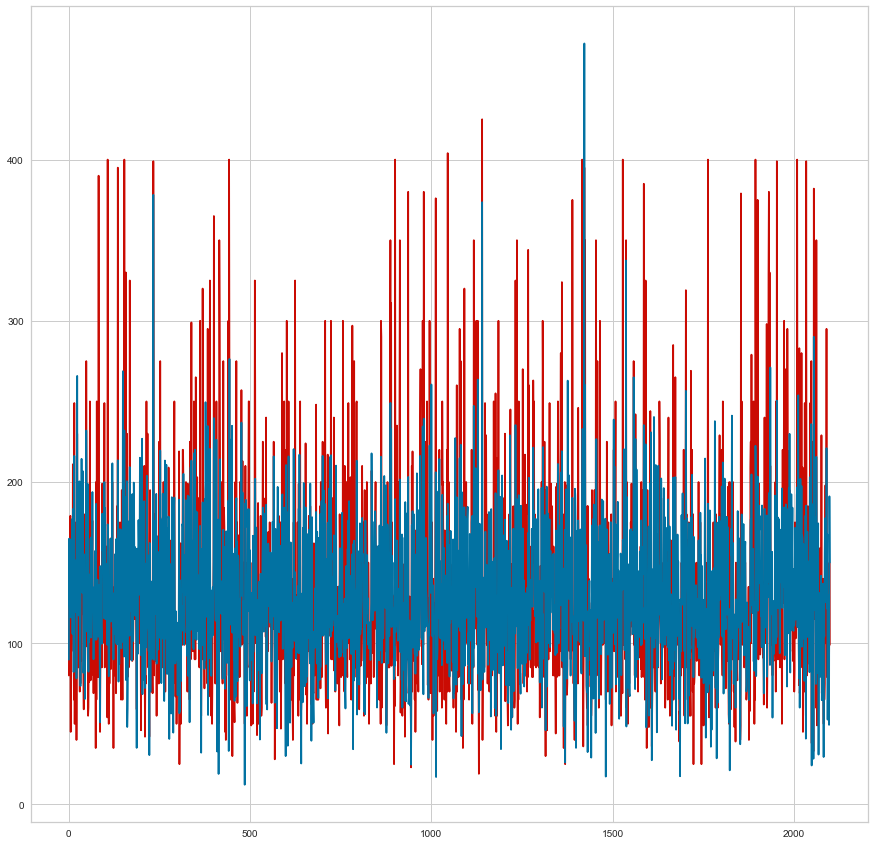

In [131]:
plt.figure(figsize=(15,15))
plt.plot(T_test,'r')
plt.plot(Y_least_squares)


Here we are plotting the actual values represented in red and predicted values by least squares in blue. As we can see there is a slight to moderate difference between the actual and predicted target values of prices. This may be because we have normalized the data so LS is able to fit well.

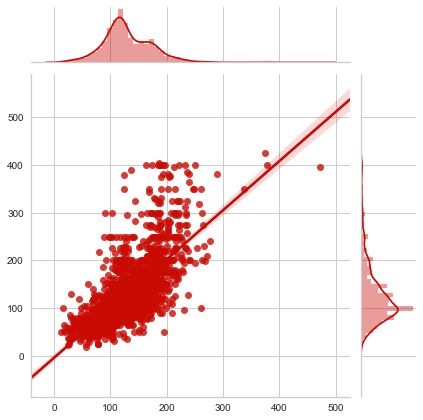

In [132]:
sns.jointplot( x=Y_least_squares, y=T_test, kind='reg', color='r')

The above scatter plot between predicted and actual values showcase a approx straight line(best fit line) ie. Lienar dependency.

## For Least Mean Squares

- Plot for actual vs predicted values

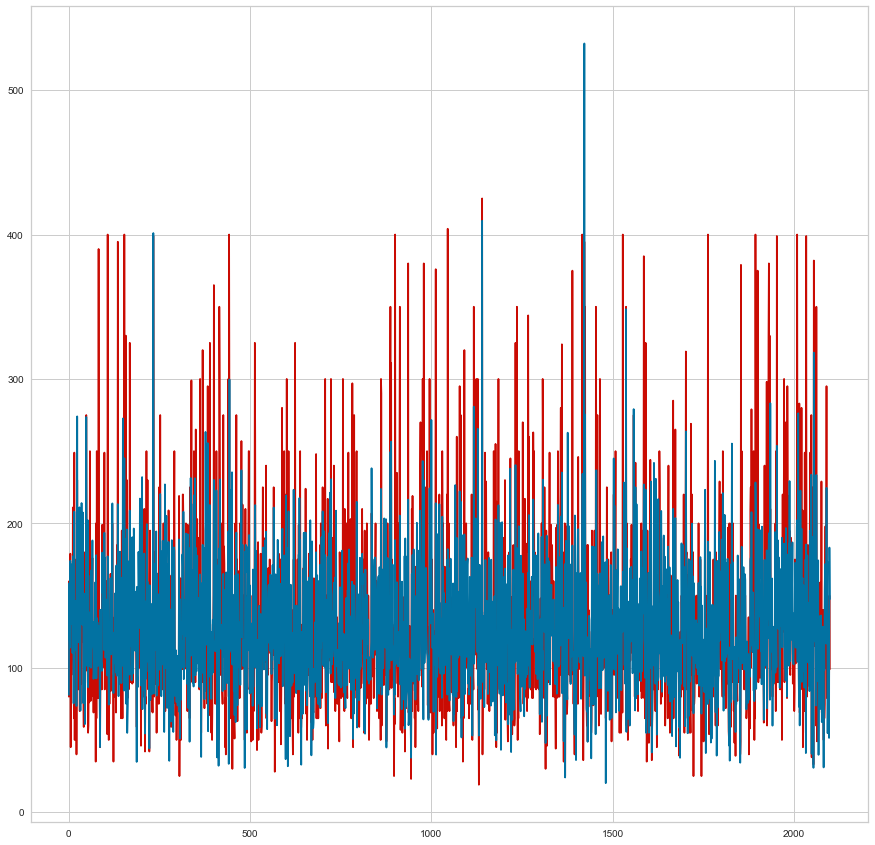

In [133]:
plt.figure(figsize=(15,15))
plt.plot(T_test,'r')
plt.plot(Y_least_mean_squares)


Here we are plotting the actual values represented in red and predicted values by least mean squares in blue. As we can see there is slight to moderate difference between the actual and predicted values. The difference is still less than the Least Squares .

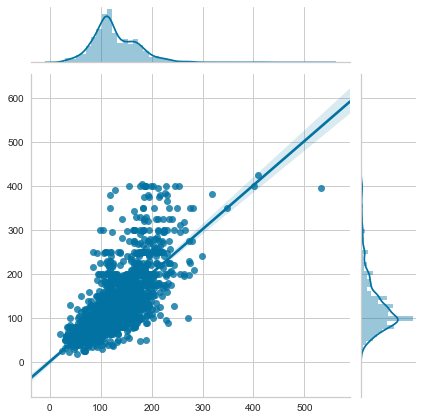

In [134]:
sns.jointplot( x=Y_least_mean_squares, y=T_test, kind='reg', color='b')

The above scatter plot between actual and predicted values roughly forms a straight line. Thus the LMS model constructed is able to predict better

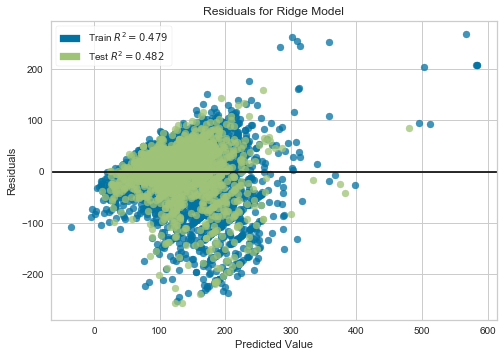

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model,hist=False)

visualizer.fit(X_train, T_train)  # Fit the training data to the visualizer
visualizer.score(X_test, T_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

The above residual plot is scattered around the horizontal line indicating that the input attributes used(all attributes are used) are fit for linear regression. The residuals should not be either systematically high or low. So, the residuals should be centered on zero throughout the range of fitted values. 

# Analysis / Comparison of Algorithms

From the above implementations and visualization plots LMS seems to be better than Least Squares. 

For Least Square technique, complete data matrix and target variable matrix is considered at once and the weights are computed. While in Least mean squares method weights are updated for each instance. LMS is based on the gradient descent algorithm which starts by assuming small weights (zero in most cases) and, at each step (for every instance) , by finding the gradient of the mean square error, the weights are updated. Thus, if the MSE-gradient is positive, it implies the error would keep increasing positively if the same weight is used for further iterations, which means we need to reduce the weights. In the same way, if the gradient is negative, we need to increase the weights.

In least squares, we use all the available data for finding the best fit which can be computationally costly in case of large dataset. Also Least Squares is sensitive to outliers as it uses squares. A rogue outlier given an inappropriate weight could dramatically skew the results.

In code, for Least Squares, train method computes the weight by using the following formula by accepting the feature matrix and target variable vector $$ w= {(X^TX)^{-1}X^Tt} $$ 
For Least Mean Squares, train method computes the weight for every instance by calling train_step method where basicaly the weights are updated. Uses the formula-$$ w^{(k+1)}={w^{k}−α((w^{k})^⊤x_k−t^k)x_k} $$
For both, the use method computes the predicted values for testing feature matrix based on the weights calculated in their respective train methods. This done by taking a dot product between the matrix and the weights calculated. In Least Mean Squares we need to supply the learning rate which is the amount by which the weights are updated during training. For 0.0005 value, the error is low and the model is able to fit well the train data and predict. For values considerably higher or lower than this the error is significantly high.  

From Visualizations of predicted vs actual plots, for Least Squares, in the first plot it is clear that the model is estimating the target values just ok. The scatter plot for the same showcase that there is slight linear dependency. For Least Mean Squares, in the first plot the predicted are somewhere near to the actual one compared to the Least Squares.From the scatter polt we can conclude that there is somewhat linear dependency betwen the input features and target variable (Price). Also, the RSME score is used for futher verification of model's accuracy. For Leasst Squares, The RSME value is of 46.46  compare to the RSME value of Least Mean Squares which is 46.40
Thus, Least Mean Squares has performed well compare to Least squraes due to the weight updation method of it and also due to the alpha-value provided





# Conclusions

In this Assignment, I have learned to build two Linear Regression models- Least squares and Least mean Squares. The main challenge was to understand the concept and passing the preliminary test without crossing the mentioned error. Apart from this I have learnt that preprocessing and visualization are very crutial. In Preprocessing, I have normalized the data so that the models are not affected by the outliers or noise. This has a great impact on the model's performance especially for the Least squares model. The different visualization plots between dependent and independent and within the independent variables tells a lot about the correlation between the data. This information can be used for selecting relevant features for training the model.

Both Least Squares and Least mean Squares take Euclidean distances and Error function into consideration while computing the weights. The difference is in their training process where, Least Squares considers all the input attributes at the same time but LMS considers one instance at a time of the input matrix like online learning. Thus, LMS is able to better fir the data since the weights converge to become optimum. Also, in least squares, we use all the available data for finding the best fit which can be computationally costly in case of large dataset.

From the visualizations and observations on complete data for Least Squares and Least Mean Squares, LMS is performing slightly better than Least Squares with RMSE values of 46.40 and 46.46 respectively. The residual plots also showcase good distribution of points around the horizontal line which means data is good fit for Linear Regression.Thus from both the model's visualization we can conclude that when entire data was considered to predict the target value linear dependency was seen and thus the problem can be solved by using Linear regression. 

Thus to construct a accurate model for the given data, every step from preprocessing, visualizing, selecting the relevant features to bulding a model are crutial.


# Extra Credit

- To find the most and the least correlated attribute with the target ie. the Price attribute

In [100]:
c_relation['Price'].sort_values(ascending = False)

Price                             1.000000
accommodates                      0.558171
bedrooms                          0.520988
room_type_Entire home/apt         0.357866
guests_included                   0.340153
bathrooms                         0.287902
calculated_host_listings_count    0.112463
host_listings_count               0.108431
longitude                         0.040068
latitude                          0.027197
instant_bookable_f                0.004778
minimum_nights                    0.002005
instant_bookable_t               -0.004778
room_type_Shared room            -0.043116
number_of_reviews                -0.082758
d_centre                         -0.209025
room_type_Private room           -0.353685
Name: Price, dtype: float64

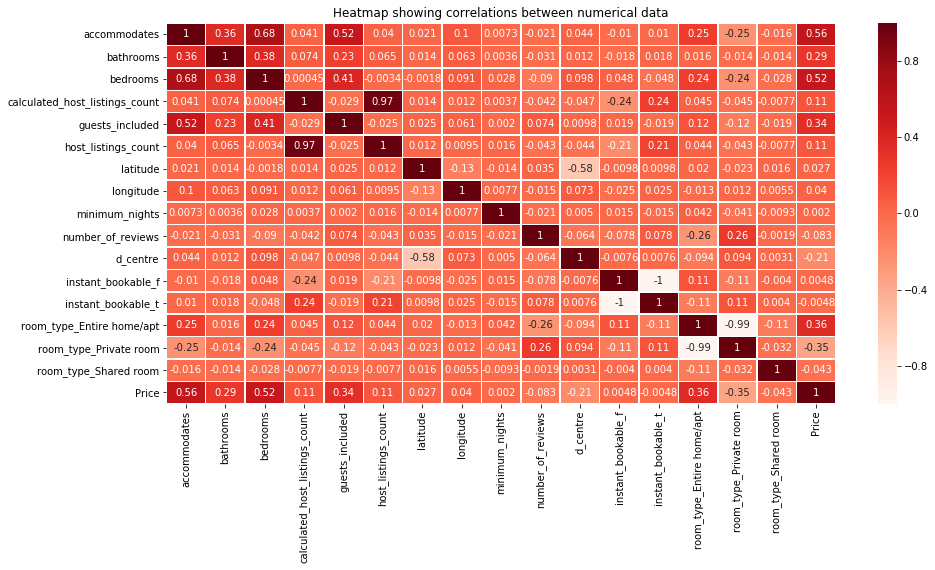

In [8]:
plt.figure(figsize=(15,7))  
sns.heatmap(df_assg1.corr(),annot=True,linewidths=.5, cmap="Reds")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

- Thus Price is highly correlated with accommodates and bedrooms and least with d_centre and room_type_Private room 

### 1. Model after removing the most relevant features from data

In [190]:
x_train_no_rel=X.drop(['accommodates','bedrooms'],axis=1)

Xlst, Tlst = partition(x_train_no_rel, y_train)
X_train1, X_test1 = [xx.as_matrix() for xx in Xlst]
T_train1, T_test1 = [tt.as_matrix() for tt in Tlst]

### Least Squares

In [191]:
least_squares = LinearRegress()
least_squares.train(X_train1, T_train1)
Y_least_squares = least_squares.use(X_test1)
#Y_least_squares = least_squares.use(X_train)

In [192]:
np.sqrt(np.mean((T_test1 - Y_least_squares)**2))

202.64058573135011

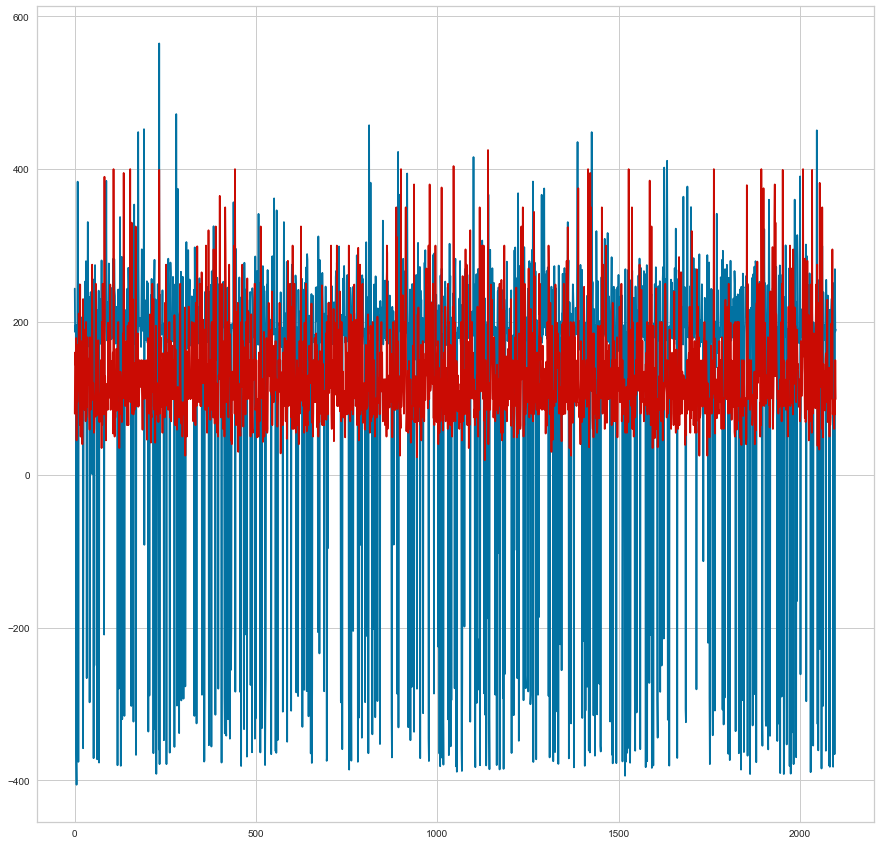

In [139]:
plt.figure(figsize=(15,15))
plt.plot(Y_least_squares)
plt.plot(T_test1,'r')


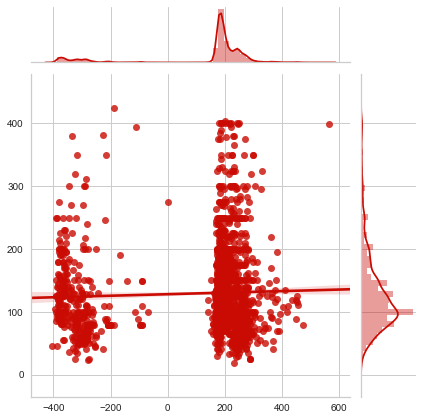

In [140]:
sns.jointplot( x=Y_least_squares, y=T_test1, kind='reg', color='r')

For Least Squares, after removing the highly correlated features, there is a significant difference between the  actual and predicted values in both the plots. The RMSE error is also increased to 202.64 from 46.45. Thus after removal of highly correlated features, the Least Square Model is performing poorly.

### Least Mean Squares

In [141]:
least_mean_squares = LMS(.0005)
least_mean_squares.train(X_train1, T_train1)
Y_least_mean_squares = least_mean_squares.use(X_test1)
#Y_least_mean_squares = lms.use(X_train)

In [142]:
np.sqrt(np.mean((T_test1 - Y_least_mean_squares)**2))

52.450298708443995

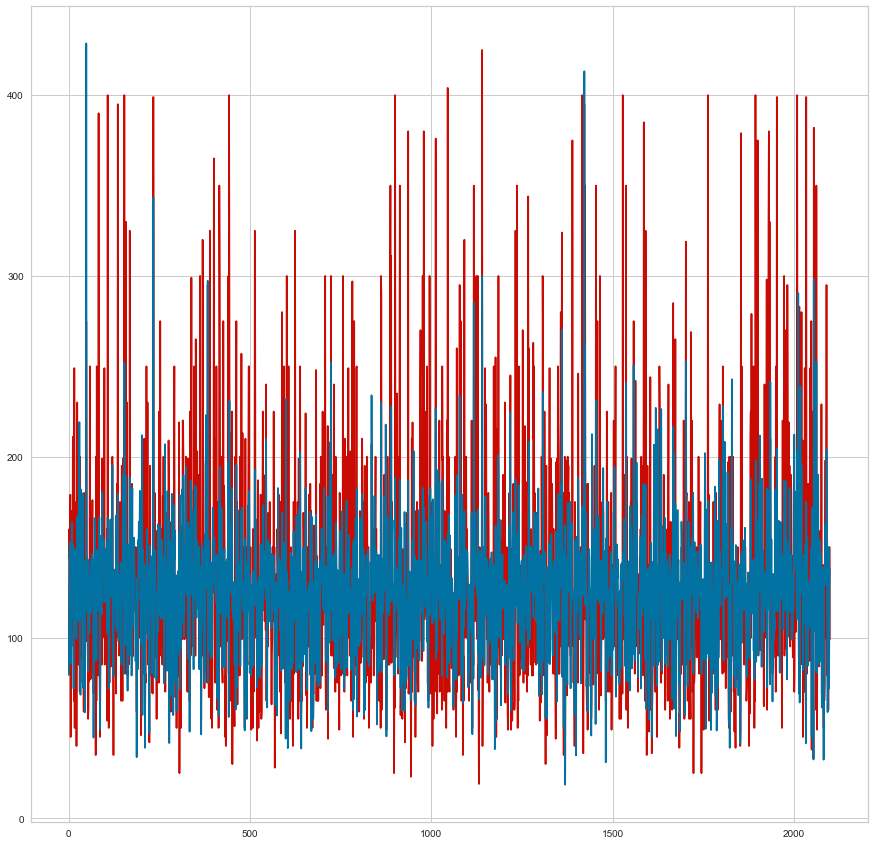

In [143]:
plt.figure(figsize=(15,15))
plt.plot(T_test1,'r')
plt.plot(Y_least_mean_squares)


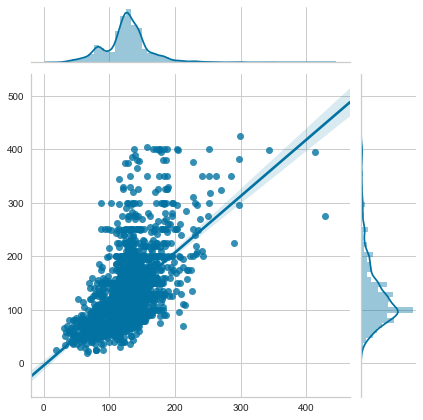

In [144]:
sns.jointplot( x=Y_least_mean_squares, y=T_test1, kind='reg', color='b')

For, Least Mean Squares there is no significant difference between the LMS implemented with highly correlated attributes compare to LMS without them. The RMSE is increased from 46 to 52 .Also the scatter plot remains same ie. prediction is still good.

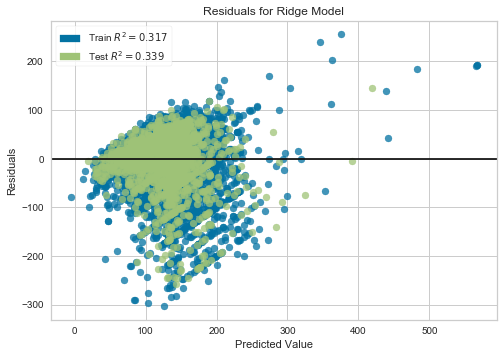

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model,hist=False)

visualizer.fit(X_train1, T_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, T_test1)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

The R-square values have decreased compared to with correlated attributes, though not a significant difference. 
Thus, dropping the significant correlated attributes had significant effect for Least Squares but for LMS not much difference is observed. But we can conclude that dropping off the relevant features, can cause model performance to degrade

### 2. Dropping off the least significant features

In [152]:
x_train_no_rel_least=X.drop(['d_centre','room_type_Private room'],axis=1)

Xlst, Tlst = partition(x_train_no_rel_least, y_train)
X_train2, X_test2 = [xx.as_matrix() for xx in Xlst]
T_train2, T_test2 = [tt.as_matrix() for tt in Tlst]


,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Shared room
0,0.833805,2.438142,0.724411,-0.213594,-0.528696,-0.210573,-0.433177,1.275396,-0.114181,-0.279629,0.429018,-0.429018,0.535692,-0.061061
1,0.833805,-0.333146,0.724411,-0.213594,0.517731,-0.210573,-0.109538,2.686171,0.010889,-0.510061,0.429018,-0.429018,0.535692,-0.061061
2,-0.673563,-0.333146,-0.458489,-0.213594,-0.528696,-0.210573,0.624364,-0.781826,0.010889,-0.279629,0.429018,-0.429018,0.535692,-0.061061
3,-0.673563,-0.333146,-0.458489,-0.213594,-0.528696,-0.210573,1.393224,0.039110,-0.114181,0.670906,0.429018,-0.429018,-1.866568,-0.061061
4,-0.673563,-0.333146,-0.458489,-0.213594,-0.528696,-0.210573,1.183539,0.022589,0.010889,-0.510061,0.429018,-0.429018,0.535692,-0.061061


### Least Squares

In [149]:
least_squares = LinearRegress()
least_squares.train(X_train2, T_train2)
Y_least_squares = least_squares.use(X_test2)
#Y_least_squares = least_squares.use(X_train)

In [150]:
np.sqrt(np.mean((T_test2 - Y_least_squares)**2))

49.92487484062333

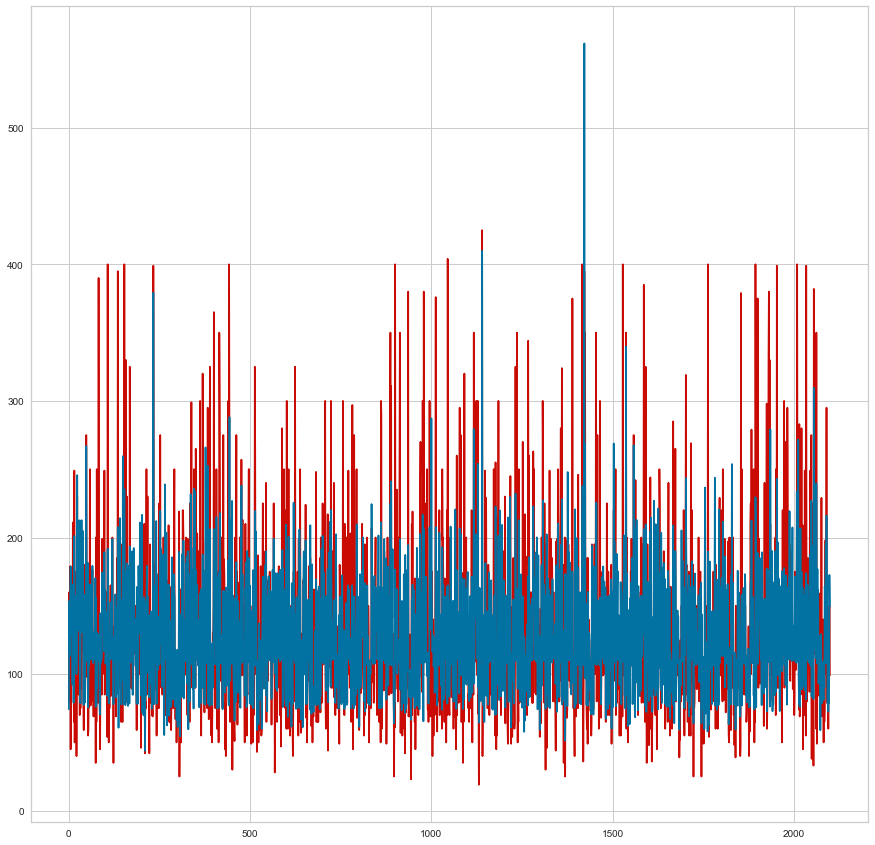

In [165]:
plt.figure(figsize=(15,15))
plt.plot(T_test2,'r')
plt.plot(Y_least_mean_squares)


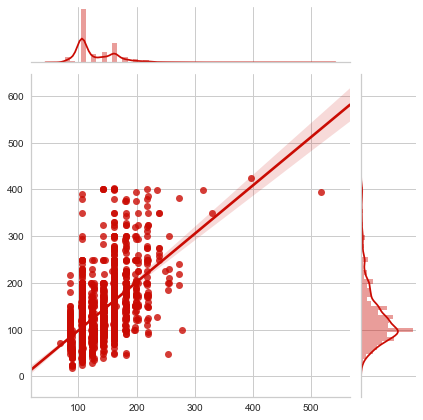

In [166]:
sns.jointplot( x=Y_least_squares, y=T_test2, kind='reg', color='r')

For Least Square without the least significant features performed better that Least Square without most significant feature. This can be seen from the graphs plotted and also by looking at the RMSE score which is 49.5 compare to 202.64 of later. But compare to original case where all attributes are considered, the RMSE of this one has increased which is unusual. This couuld be beacuse the least significant attributes considered for dropping could be somewhat correlated with target attribute 'Price' as their values affect the accuracy of the model.

### Least Mean Squares 

In [180]:
least_mean_squares = LMS(.0005)
least_mean_squares.train(X_train2, T_train2)
Y_least_mean_squares = least_mean_squares.use(X_test2)
#Y_least_mean_squares = lms.use(X_train)

In [181]:
np.sqrt(np.mean((T_test2 - Y_least_mean_squares)**2))

49.77488687244649

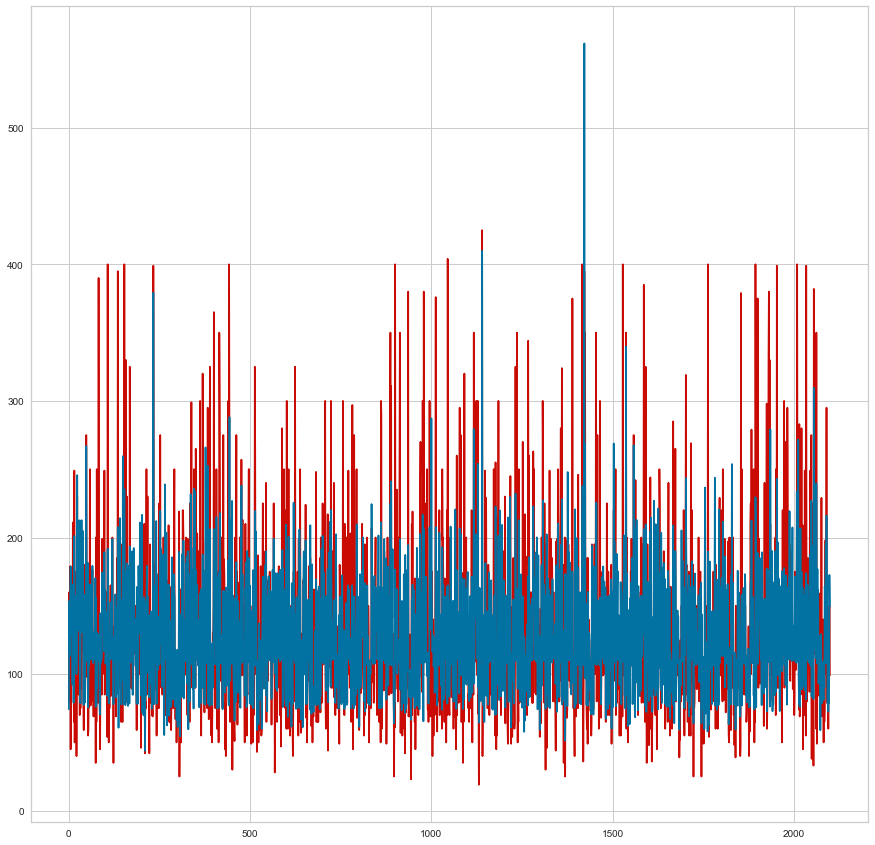

In [182]:
plt.figure(figsize=(15,15))
plt.plot(T_test2,'r')
plt.plot(Y_least_mean_squares)


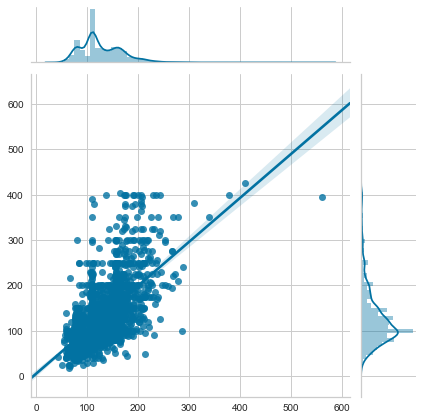

In [155]:
sns.jointplot( x=Y_least_mean_squares, y=T_test2, kind='reg', color='b')

For Least Mean Squares without the least significant features performed almost similar to that Least Mean Squares without most significant feature. This can be seen from the graphs plotted and RMSE values which have no much difference. But when compared to the original model taking all the data,Least Mean Squares without the least significant features hasn't performed that well as RMSE value of the later is greater that original like for Least Squares. Thus, least significant attributes dropped are somewhat related to the target attribute. 

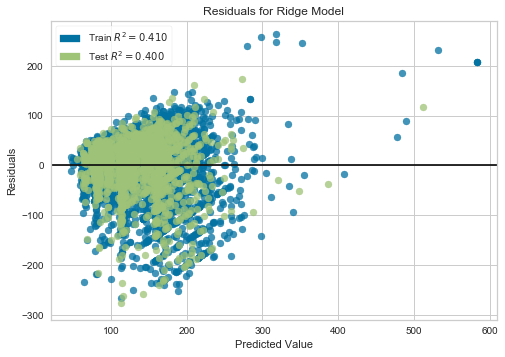

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model,hist=False)

visualizer.fit(X_train2, T_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, T_test2)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

For residuals plot , we can say that 
R-square(Original)>R-square(dataset after dropping least significant)>R-square(dataset after dropping most significant)

### 3. Training only with most significant features

In [162]:
x_train_high_rel=X[['accommodates','bedrooms']]

Xlst, Tlst = partition(x_train_high_rel, y_train)
X_train3, X_test3 = [xx.as_matrix() for xx in Xlst]
T_train3, T_test3 = [tt.as_matrix() for tt in Tlst]

#### Least Squares

In [163]:
least_squares = LinearRegress()
least_squares.train(X_train3, T_train3)
Y_least_squares = least_squares.use(X_test3)
#Y_least_squares = least_squares.use(X_train)

In [164]:
np.sqrt(np.mean((T_test3 - Y_least_squares)**2))

52.457325372321925

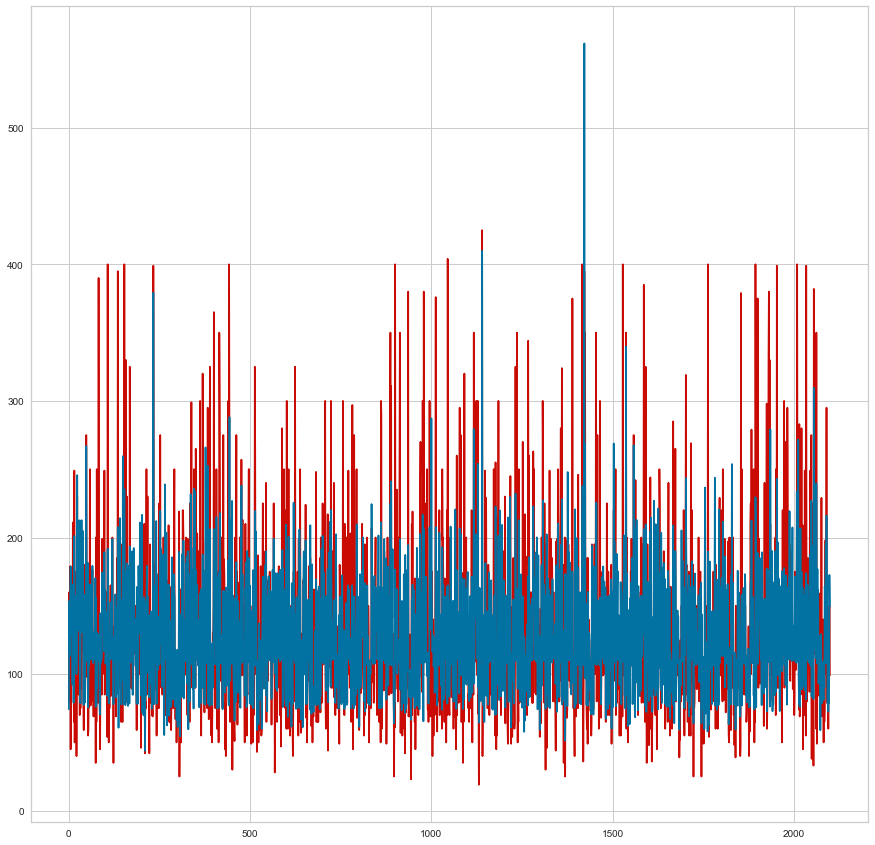

In [167]:
plt.figure(figsize=(15,15))
plt.plot(T_test3,'r')
plt.plot(Y_least_mean_squares)


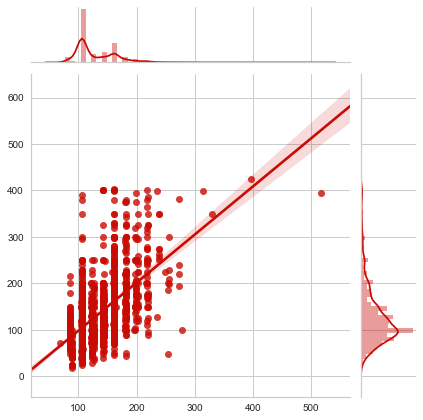

In [168]:
sns.jointplot( x=Y_least_squares, y=T_test3, kind='reg', color='r')

Thus, from the above plots its clear that the if only the best features are considered still the model performance doesn't boost highly compare to the original. This means that for Least squares, the target value is dependent on the best as well as some moderately related attributes

#### Least Mean Squares

In [184]:
least_mean_squares = LMS(.0005)
least_mean_squares.train(X_train3, T_train3)
Y_least_mean_squares = least_mean_squares.use(X_test3)
#Y_least_mean_squares = lms.use(X_train)

In [185]:
np.sqrt(np.mean((T_test3 - Y_least_mean_squares)**2))

52.483424558462275

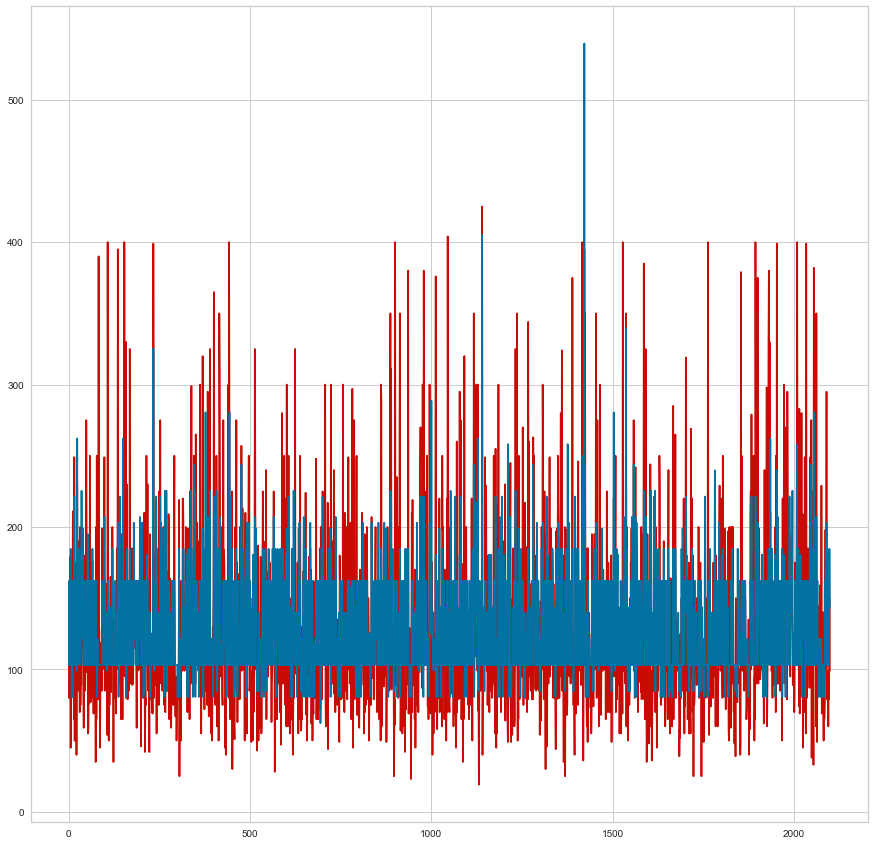

In [186]:
plt.figure(figsize=(15,15))
plt.plot(T_test3,'r')
plt.plot(Y_least_mean_squares)


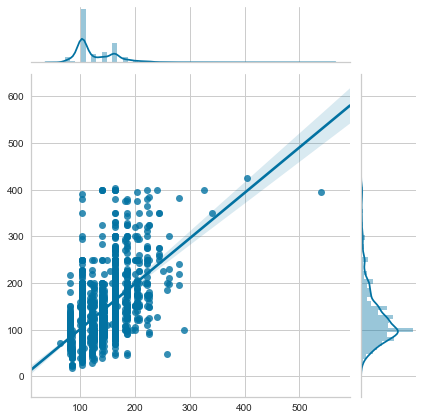

In [173]:
sns.jointplot( x=Y_least_mean_squares, y=T_test3, kind='reg', color='b')

Similar to Least Squares, here too the performance hasn't boosted compare to the original. Thus for Least Mean squares, the target value is dependent on the best as well as some moderately related attributes

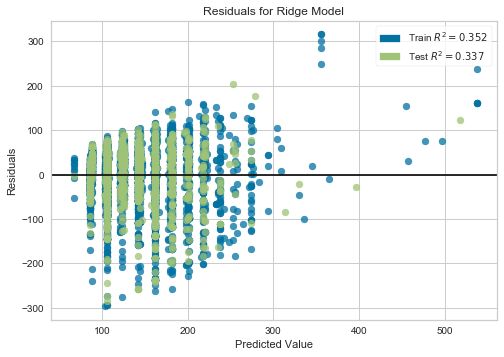

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model,hist=False)

visualizer.fit(X_train3, T_train3)  # Fit the training data to the visualizer
visualizer.score(X_test3, T_test3)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

### Conclusions

When most significant features are removed, Least squares performs poorly and LMS performs similar to the original one where all attributes are considered.
When least significant features are removed, Least squares and LMS both performs some what similar to the original case. But here the RMSE for model without least significant features is more than the original.Thus,least significant attributes dropped are somewhat related to the target attribute.
Also, when only the relevant attributes were considred, the performance didn't boosted much compare to the original. 
This indicates that the the original case were all the attributes were considered for prediction was the best one for both the models as when removing least and most feature has no relevant effect on the model's accuracy.


# References



Aditya Deshpande, 'Amsterdam - AirBnb' https://www.kaggle.com/adityadeshpande23/amsterdam-airbnb
(https://www.kaggle.com/adityadeshpande23/amsterdam-airbnb)

Wikipedia. "Least mean squares filter", Wikipedia https://en.wikipedia.org/wiki/Least_mean_squares_filter 
(https://en.wikipedia.org/wiki/Least_mean_squares_filter)

Karlijn Willems "Python Seaborn Tutorial For Beginners" Datacamp https://www.datacamp.com/community/tutorials/seaborn-python-tutorial (https://www.datacamp.com/community/tutorials/seaborn-python-tutorial)

Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006), http://www.numpy.org/
(http://www.numpy.org/)

Aurélien Géron, "Hands on Machine learning with scikit learn and Tensorflow", O'Reilly Media, 2017